In [81]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import pearsonr


# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

import plotly.io as pio 
pio.renderers.default = 'vscode'

In [98]:
# Create properties dataframe
mel_sales_df = pd.read_csv('Resources/Property Sales of Melbourne City.csv')
mel_sales_df = mel_sales_df.drop(['Unnamed: 0'], axis=1)

# Display sample data
mel_sales_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Text(0, 0.5, 'Price')

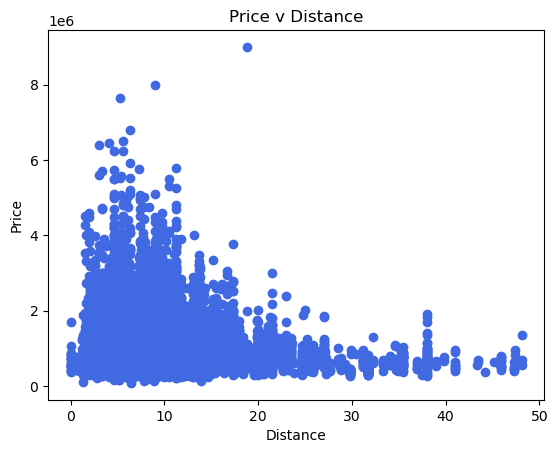

In [99]:
#turning columns to numaric format
x=mel_sales_df['Distance'] = pd.to_numeric(mel_sales_df['Distance'])
y=mel_sales_df['Price'] = pd.to_numeric(mel_sales_df['Price'])

#scatter plot for price v distance
plt.scatter(x,y,color="royalblue")
plt.title("Price v Distance")
plt.xlabel("Distance")
plt.ylabel("Price")

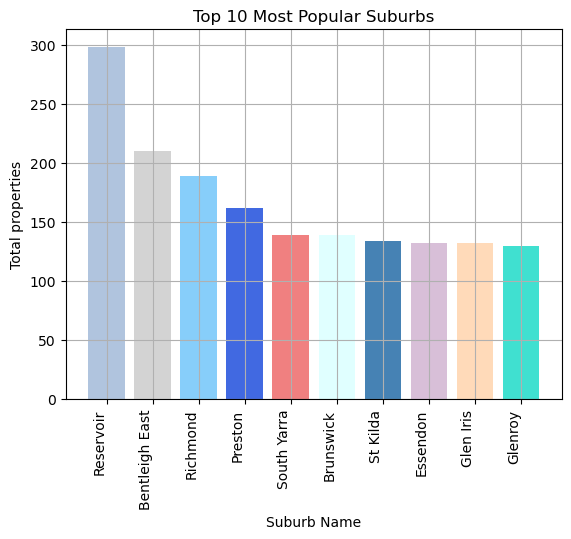

In [100]:
mel_sales_df['Year'] = mel_sales_df['Date'].apply(lambda date_str: date_str.split('/')[-1])
mel_sales_2016 = mel_sales_df.loc[mel_sales_df['Year'] == '2016']
sub_count=mel_sales_2016["Suburb"].value_counts().values[:10]
sub_name=mel_sales_2016["Suburb"].value_counts().head(10).index.tolist()

#colors
colors = ['lightsteelblue', 'lightgrey', 'lightskyblue', 'royalblue', 'lightcoral', 'lightcyan', 'steelblue', 'thistle','peachpuff','turquoise']


fig, x = plt.subplots()

# Plot the bar chart with different colors for each bar
x.bar(sub_name, sub_count, color=colors)

# Assign names to the figure
x.set_title('Top 10 Most Popular Suburbs')
x.set_ylabel('Total properties')
x.set_xlabel('Suburb Name')
plt.xticks(rotation=90, ha='right')
plt.grid()

# Save the figure
plt.savefig('subs_bar.png', bbox_inches='tight')
plt.show()

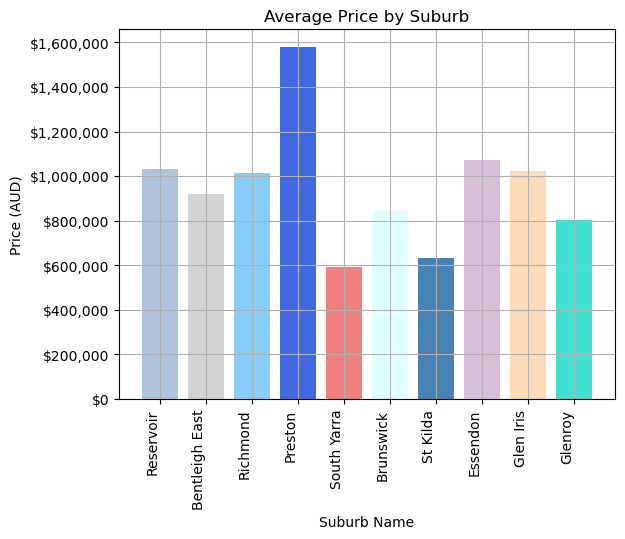

In [101]:
# Filter data by using top ten suburbs
sub_group=mel_sales_2016[mel_sales_2016["Suburb"].isin(sub_name)]
sub_price=sub_group.groupby("Suburb")["Price"].mean()
fig, x = plt.subplots()

# Plot the bar chart with different colors for each bar
x.bar(sub_name, sub_price, color=colors)

# Format the y-axis to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
x.yaxis.set_major_formatter(tick)

# Assign names to the figure
x.set_title('Average Price by Suburb')
x.set_ylabel('Price (AUD)')
x.set_xlabel('Suburb Name')
plt.xticks(rotation=90, ha='right')
plt.grid()

# Save the figure
plt.savefig('Price_Sub.png', bbox_inches='tight')
plt.show()

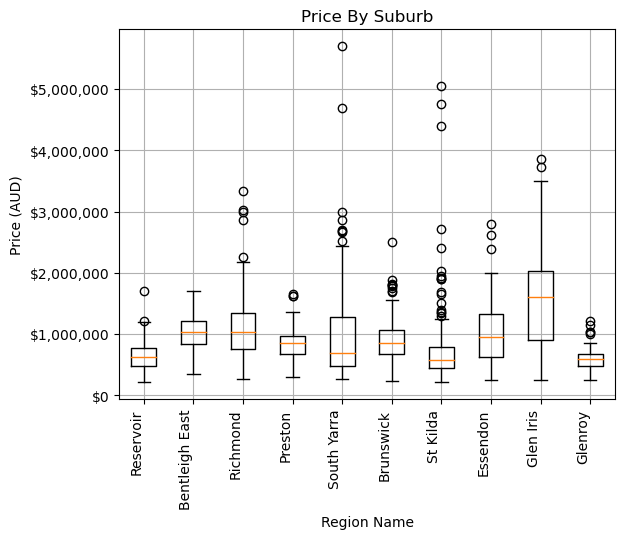

In [102]:
#filter out the dataframe using region name
df1=sub_group.loc[sub_group["Suburb"]==sub_name[0]]
df2=sub_group.loc[sub_group["Suburb"]==sub_name[1]]
df3=sub_group.loc[sub_group["Suburb"]==sub_name[2]]
df4=sub_group.loc[sub_group["Suburb"]==sub_name[3]]
df5=sub_group.loc[sub_group["Suburb"]==sub_name[4]]
df6=sub_group.loc[sub_group["Suburb"]==sub_name[5]]
df7=sub_group.loc[sub_group["Suburb"]==sub_name[6]]
df8=sub_group.loc[sub_group["Suburb"]==sub_name[7]]
df9=sub_group.loc[sub_group["Suburb"]==sub_name[8]]
df0=sub_group.loc[sub_group["Suburb"]==sub_name[9]]


#boxplot
Label=sub_name
results=[df1["Price"],df2["Price"],df3["Price"],df4["Price"],df5["Price"],df6["Price"],df7["Price"],df8["Price"],df9["Price"],df0["Price"]]
box_plot, region_plot=plt.subplots()
plt.xticks(rotation=90, ha='right')
region_plot.boxplot(results, labels=Label)

#Format the y-axis to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
region_plot.yaxis.set_major_formatter(tick)

#Assign names to the figure
region_plot.set_title('Price By Suburb')
region_plot.set_ylabel('Price (AUD)')
region_plot.set_xlabel('Region Name')

plt.grid()
plt.savefig('box_plot', bbox_inches='tight')

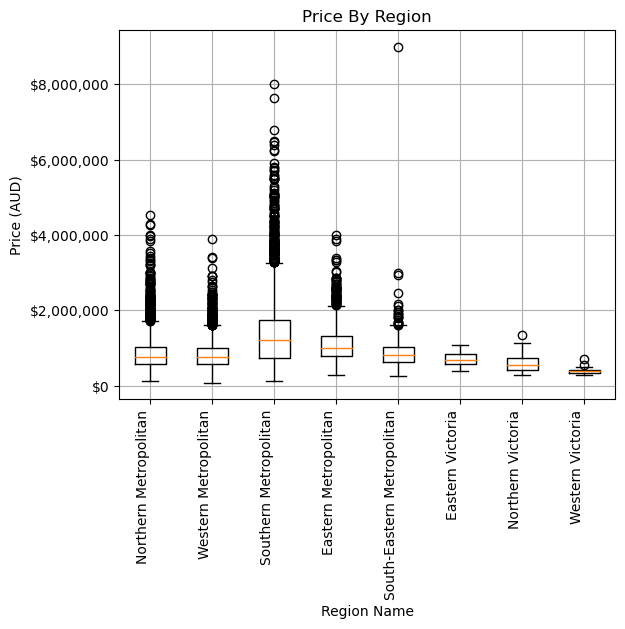

In [103]:
#filter out the dataframe using region name
all_region=mel_sales_df["Regionname"].unique()
df1=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[0]]
df2=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[1]]
df3=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[2]]
df4=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[3]]
df5=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[4]]
df6=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[5]]
df7=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[6]]
df8=mel_sales_df.loc[mel_sales_df["Regionname"]==all_region[7]]

#Find median
medians = [df["Price"].median() for df in [df1, df2, df3, df4, df5, df6, df7, df8]]

#boxplot
Label=['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria']
results=[df1["Price"],df2["Price"],df3["Price"],df4["Price"],df5["Price"],df6["Price"],df7["Price"],df8["Price"]]
box_plot, region_plot=plt.subplots()
plt.xticks(rotation=90, ha='right')
region_plot.boxplot(results, labels=Label)

#Format the y-axis to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
region_plot.yaxis.set_major_formatter(tick)

#Assign names to the figure
region_plot.set_title('Price By Region')
region_plot.set_ylabel('Price (AUD)')
region_plot.set_xlabel('Region Name')

plt.grid()
#plt.savefig('Output Data/Graph Images/Ammar_Box_PlotByRegion', bbox_inches='tight')

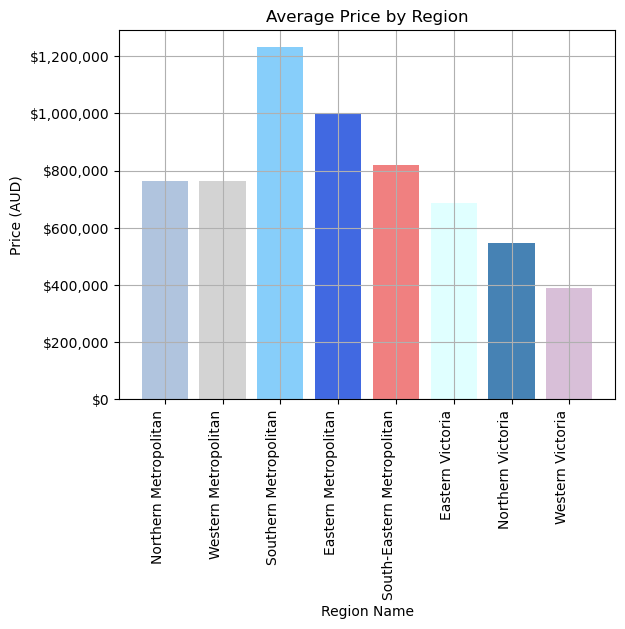

In [104]:
# Select data
bar_results = medians
labels = Label
fig, x = plt.subplots()

# Plot the bar chart with different colors for each bar
x.bar(labels, bar_results, color=colors)

# Format the y-axis to display values in dollars
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
x.yaxis.set_major_formatter(tick)

# Assign names to the figure
x.set_title('Average Price by Region')
x.set_ylabel('Price (AUD)')
x.set_xlabel('Region Name')
plt.xticks(rotation=90, ha='right')
plt.grid()

# Save the figure
#plt.savefig('Output Data/Graph Images/Ammar_AveragePriceByReagionBar_chart.png', bbox_inches='tight')
plt.show()

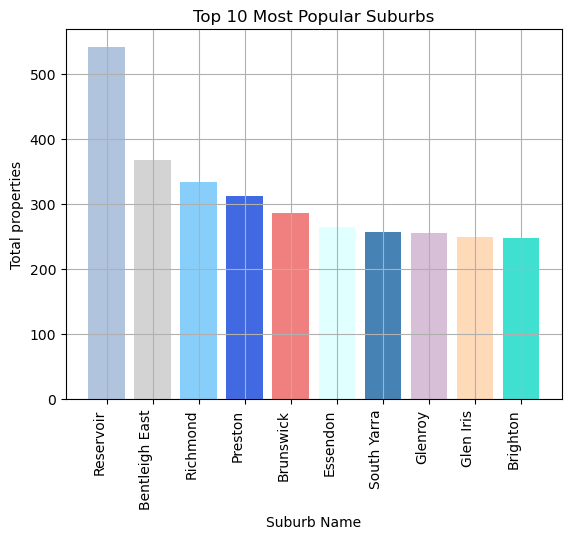

array([541, 368, 333, 312, 286, 265, 257, 256, 249, 247])

In [105]:
sub_count=mel_sales_df["Suburb"].value_counts().values[:10]
sub_name=mel_sales_df["Suburb"].value_counts().head(10).index.tolist()

labels = Label
fig, x = plt.subplots()

# Plot the bar chart with different colors for each bar
x.bar(sub_name, sub_count, color=colors)


# Assign names to the figure
x.set_title('Top 10 Most Popular Suburbs')
x.set_ylabel('Total properties')
x.set_xlabel('Suburb Name')
plt.xticks(rotation=90, ha='right')
plt.grid()

plt.show()

sub_count

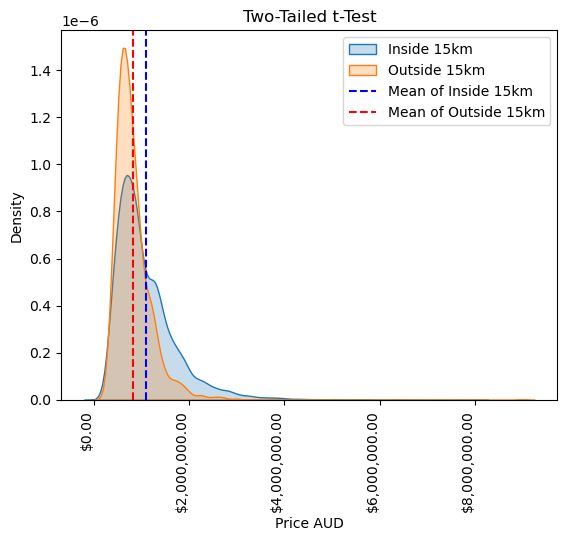

t-statistic: 19.113053516390284
p-value: 1.1895198924708595e-80


In [107]:
#T-test
inside_15km=mel_sales_df.loc[mel_sales_df["Distance"]<= 15]
outside_15km=mel_sales_df.loc[mel_sales_df["Distance"]> 15]
inside_col=inside_15km['Price']
outside_col=outside_15km['Price']

av_1=inside_col.mean()
av_2=outside_col.mean()


# Conduct independent t-test
t_stat, p_value = stats.ttest_ind(inside_col,outside_col)

# Plot using KDE plots
fig, ax = plt.subplots()
sns.kdeplot(inside_col, ax=ax, label='Inside 15km', shade=True)
sns.kdeplot(outside_col, ax=ax, label='Outside 15km', shade=True)
ax.axvline(x=np.mean(inside_col), color='blue', linestyle='--', label='Mean of Inside 15km')
ax.axvline(x=np.mean(outside_col), color='red', linestyle='--', label='Mean of Outside 15km')
plt.xticks(rotation=90, ha='right')
# Format the y-axis to display prices in dollars
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

ax.set_xlabel('Price AUD')
ax.set_ylabel('Density')
ax.set_title('Two-Tailed t-Test')
ax.legend()
plt.show()

# Print the t-statistic and p-value
print('t-statistic:', t_stat)
print('p-value:', p_value)

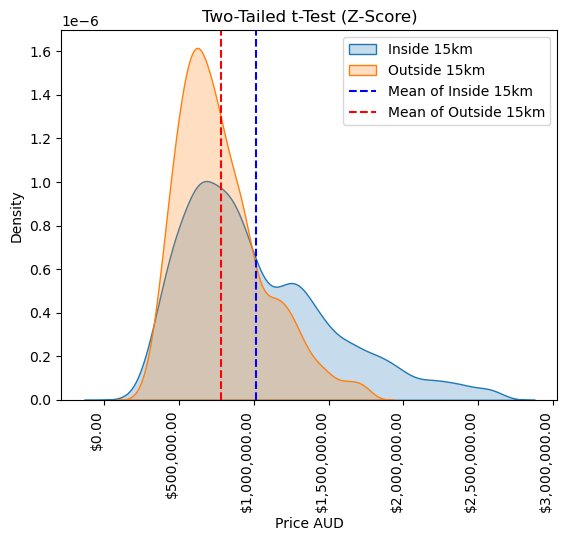

In [113]:
# Plot using KDE plots
fig, ax = plt.subplots()
sns.kdeplot(inside_col, ax=ax, label='Inside 15km', shade=True)
sns.kdeplot(outside_col, ax=ax, label='Outside 15km', shade=True)
ax.axvline(x=np.mean(inside_col), color='blue', linestyle='--', label='Mean of Inside 15km')
ax.axvline(x=np.mean(outside_col), color='red', linestyle='--', label='Mean of Outside 15km')
plt.xticks(rotation=90, ha='right')

# Remove outliers using z-score (Outside)
z_scores = stats.zscore(inside_col)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
inside_col = inside_col[filtered_entries]

# Remove outliers using z-score (Inside)
z_scores = stats.zscore(outside_col)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
outside_col = outside_col[filtered_entries]

# Format the y-axis to display prices in dollars
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

ax.set_xlabel('Price AUD')
ax.set_ylabel('Density')
ax.set_title('Two-Tailed t-Test (Z-Score)')
ax.legend()
plt.show()